<a href="https://colab.research.google.com/github/vinodgaitonde/Assignments/blob/main/Linear_Algebra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Algebra and Calculus Assignment
##### Introduction
This assignment covers three main topics: Linear Algebra, Calculus, and Data Processing and visualisation techniques. You will implement Principal Component Analysis (PCA) for image compression and a basic gradient descent algorithm for linear regression. After that you will work on solving problems posed on tabular data with the help of pandas library.
### Part 1: Linear Algebra - Principal Component Analysis (PCA)
Problem Statement - **Implement PCA to compress a grayscale image**  
Break down the PCA algorithm into the following steps:

1. Load and preprocess the image
2. Compute the covariance matrix
3. Compute eigenvectors and eigenvalues
4. Select top k eigenvectors
5. Project the data onto the new subspace
6. Reconstruct the compressed image
7. Bring it all together in the main function


<div>
  <a href="https://colab.research.google.com/github/emharsha1812/CCE_Assignment/blob/main/Assignments/Linear_Algebra.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
  </a>
</div>

### 1.0 Loading and preprocessing the image  

**Already Done**  Load a grayscale image using an appropriate library  
**Already Done**: Reshape the image into a 2D array where each row represents a pixel

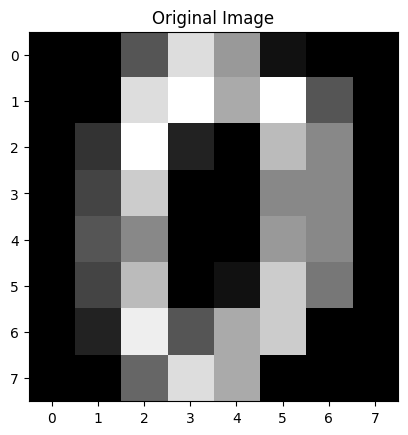

Original image shape: (8, 8)
Total number of pixels: 64


In [ ]:
# IMP - We've provided the code to load and preprocess the image data. You don't need to modify this section.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Reshape the first image
image = X[0].reshape(8, 8)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.show()

print(f"Original image shape: {image.shape}")
print(f"Total number of pixels: {image.size}")

### 1.1 Compute the covariance matrix

**TODO**: Center the data by subtracting the mean of each feature  
**TODO**: Compute the covariance matrix of the centered data

In [ ]:
# 1.1 Compute the covariance matrix
print(image)
def compute_covariance_matrix(X):
    #Compute the covariance matrix for the input data.
    mean_of_matrix = np.mean(X)
    covar_matrix = np.cov(X)
    return covar_matrix

cov_matrix = compute_covariance_matrix(image)
print(cov_matrix)
    #Args:
    #X (numpy.ndarray): Input data matrix

    #Returns:
    #numpy.ndarray: Covariance matrix

    # TODO: Implement the covariance matrix calculation
    # Hint: Remember to center the data by subtracting the mean
    # Avoid division by zero by adding a small epsilon value
    #pass


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[[25.42857143 23.14285714 -3.5        -6.28571429 -8.         -6.64285714
  12.35714286 26.78571429]
 [23.14285714 46.21428571 21.03571429 12.          8.78571429 16.32142857
  32.17857143 23.25      ]
 [-3.5        21.03571429 33.26785714 26.85714286 21.67857143 27.76785714
  21.19642857 -3.625     ]
 [-6.28571429 12.         26.85714286 22.85714286 18.85714286 22.85714286
  14.28571429 -6.28571429]
 [-8.          8.78571429 21.67857143 18.85714286 17.35714286 20.10714286
   9.82142857 -8.67857143]
 [-6.64285714 16.32142857 27.76785714 22.85714286 20.10714286 25.41071429
  18.26785714 -7.26785714]
 [12.35714286 32.17857143 21.19642857 14.28571429  9.82142857 18.26785714
  33.98214286 13.30357143]
 [26.7857142


### 1.2 Compute eigenvectors and eigenvalues

**TODO**: Implement a function to compute eigenvectors and eigenvalues of the covariance matrix  
**Hint**: You can use NumPy's linalg.eig function, but try to implement it yourself for learning purposes

In [ ]:
# 1.2 Compute eigenvectors and eigenvalues
def compute_eigenvectors_eigenvalues(inp_matrix):
  # compute eigen values & eigen vectors
    matrix_eigen_val, matrix_eigen_vect = np.linalg.eigh(inp_matrix)

    return matrix_eigen_val, matrix_eigen_vect

matrix_eigen_val, matrix_eigen_vect = compute_eigenvectors_eigenvalues(cov_matrix)
print(matrix_eigen_val)
print("------------------")
print(matrix_eigen_vect)
    #Compute the eigenvectors and eigenvalues of the covariance matrix.

    #Args:
    #cov_matrix (numpy.ndarray): Covariance matrix

    #Returns:
    #tuple: (eigenvalues, eigenvectors)

    # TODO: Implement eigenvector and eigenvalue calculation
    # Hint: Use numpy.linalg.eigh() for symmetric matrices
    #pass

[-1.73057932e-15  3.63617224e-16  5.40623917e-02  1.25991743e+00
  5.18187772e+00  8.49719173e+00  8.70804449e+01  1.30997934e+02]
------------------
[[ 0.53017241 -0.0362291   0.55750417  0.16342929  0.16335895 -0.27699148
  -0.51517332 -0.10616335]
 [ 0.03869351  0.12269796 -0.25247764 -0.17267406 -0.70942457 -0.08729776
  -0.37407219 -0.48893007]
 [-0.30441967  0.09869523  0.40603749 -0.59431358  0.22281933 -0.25931652
   0.23461125 -0.45560607]
 [ 0.52575261  0.09925565 -0.55678607 -0.00557826  0.37372989 -0.27607987
   0.26705173 -0.34129156]
 [-0.24753197  0.45180678  0.18090274  0.70159099 -0.10134814 -0.22314781
   0.27558242 -0.27134991]
 [ 0.00230353 -0.83022159  0.1019463   0.25744861 -0.12385355  0.05501246
   0.26280515 -0.38291169]
 [ 0.01934715  0.18437208  0.03760069  0.07563409  0.29789632  0.80342332
  -0.17522001 -0.43996023]
 [-0.53542618 -0.19144169 -0.32562911  0.16125929  0.40786613 -0.27180753
  -0.54091877 -0.1086406 ]]



### 1.3 Select top k eigenvectors

**TODO**: Implement a function to select the top k eigenvectors based on their corresponding eigenvalues  
**TODO**: Create a projection matrix using these eigenvectors

In [ ]:
# 1.3 Select top k eigenvectors
def select_top_k_eigenvectors(eigenvalues, eigenvectors, k):
     # Sort the eigenvalues in descending order and get the indices
    sorted_indices = np.argsort(eigenvalues)[::-1]

    # Sort eigenvalues and eigenvectors based on these indices
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top k eigenvectors
    top_k_eigenvectors = sorted_eigenvectors[:, :k]

    return sorted_eigenvalues[:k], top_k_eigenvectors

sorted_eigenvalues, top_k_eigenvectors = select_top_k_eigenvectors(matrix_eigen_val, matrix_eigen_vect, 3)
    #Select the top k eigenvectors based on eigenvalues.

print(sorted_eigenvalues)
print("------------------")
print(top_k_eigenvectors)
    #Args:
    #eigenvalues (numpy.ndarray): Array of eigenvalues
    #eigenvectors (numpy.ndarray): Matrix of eigenvectors
    #k (int): Number of top eigenvectors to select

    #Returns:
    #numpy.ndarray: Top k eigenvectors
    #"""
    # TODO: Implement the selection of top k eigenvectors
    # Hint: Sort eigenvalues and select corresponding eigenvectors
    #pass

[130.99793443  87.08044487   8.49719173]
------------------
[[-0.10616335 -0.51517332 -0.27699148]
 [-0.48893007 -0.37407219 -0.08729776]
 [-0.45560607  0.23461125 -0.25931652]
 [-0.34129156  0.26705173 -0.27607987]
 [-0.27134991  0.27558242 -0.22314781]
 [-0.38291169  0.26280515  0.05501246]
 [-0.43996023 -0.17522001  0.80342332]
 [-0.1086406  -0.54091877 -0.27180753]]



### 1.4 Project the data onto the new subspace

**TODO**: Project the centered data onto the new subspace defined by the top k eigenvectors  

In [ ]:
# 1.4 Project the data onto the new subspace
def project_data(X, eigenvectors):
    # Centre the data
    X_centered = X - np.mean(X, axis=0)

    # Project the centered data onto the new subspace
    projected_data = np.dot(X_centered, eigenvectors)

    return projected_data

projected_data = project_data(image, top_k_eigenvectors)

print(projected_data)
    #Project the data onto the new subspace defined by the eigenvectors.

    #Args:
    #X (numpy.ndarray): Input data matrix
    #eigenvectors (numpy.ndarray): Matrix of selected eigenvectors

    #Returns:
    #numpy.ndarray: Projected data

    # TODO: Implement the data projection
    # Hint: Center the data and then project it onto the eigenvectors
    #pass

[[ 4.9831442   1.34044375 -5.23048786]
 [-7.17620217  6.83019169 -3.29303655]
 [-2.19214912 -1.6271797   3.93717361]
 [ 0.51705721 -4.02760455  5.01494777]
 [ 1.46763973 -5.07731659  6.01992854]
 [-0.39037316 -2.76019276  4.467743  ]
 [-1.8482166   3.73382589 -5.14830386]
 [ 4.63909992  1.58783227 -5.76796465]]


### 1.5 Reconstruct the compressed image

**TODO**: Implement a function to reconstruct the compressed image from the projected data  

In [ ]:

# 1.5 Reconstruct the compressed image
def reconstruct_image(X_projected, eigenvectors, original_mean):
    """
    Reconstruct the compressed image from the projected data.

    Args:
    X_projected (numpy.ndarray): Projected data
    eigenvectors (numpy.ndarray): Matrix of selected eigenvectors
    original_mean (numpy.ndarray): Mean of the original data

    Returns:
    numpy.ndarray: Reconstructed data
    """
    # TODO: Implement the image reconstruction
    # Hint: Project back to the original space and add the mean
    pass

### 1.6 Complete the main function

In [ ]:
# Main PCA function
def perform_pca(X, k):
    """
    Perform PCA on the input data.

    Args:
    X (numpy.ndarray): Input data matrix
    k (int): Number of principal components to keep

    Returns:
    tuple: (compressed_data, reconstructed_data, eigenvectors)
    """
    # TODO: Implement the main PCA function using the helper functions above
    # 1. Compute the covariance matrix
    # 2. Compute eigenvectors and eigenvalues
    # 3. Select top k eigenvectors
    # 4. Project the data
    # 5. Reconstruct the data
    pass

In [ ]:
# Test the implementation
k = 3  # Number of principal components to keep
compressed_data, reconstructed_data, eigenvectors = perform_pca(X, k)

# Visualize the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(X[0].reshape(8, 8), cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_data[0].reshape(8, 8), cmap='gray')
plt.title(f'Reconstructed Image (k={k})')
plt.show()

# Bonus: Determine optimal number of principal components
def explained_variance_ratio(eigenvalues):
    return eigenvalues / np.sum(eigenvalues)

# Plot the cumulative explained variance ratio vs. number of components
cov_matrix = compute_covariance_matrix(X)
eigenvalues, _ = compute_eigenvectors_eigenvalues(cov_matrix)
evr = explained_variance_ratio(eigenvalues)
cumulative_evr = np.cumsum(evr)

plt.plot(range(1, len(cumulative_evr) + 1), cumulative_evr)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Components')
plt.show()